# 投票法
- 绝对多数投票法：$H(\mathbf x) =
\begin{cases}
    c_j\text{, if }\sum_{i = 1}^Th_i^j(\mathbf x) > 0.5\sum_{k = 1}^N\sum_{i = 1}^Th_i^k(\mathbf x) \\
    \text{reject, otherwise}
\end{cases}
$
- 相对多数投票法：$H(\mathbf x) = c_{\argmax_j\sum_{i = 1}^Th_i^j(\mathbf x)}$
- 加权投票法：$H(\mathbf x) = c_{\argmax_j\sum_{i = 1}^Tw_ih_i^j(\mathbf x)}$

在现实任务中，不同类型个体学习器可能产生不同类型的$h_j^j(\mathbf x)$值，常见的有:
- 类标记：$h_i^j(\mathbf x) \in \{0, 1\}$，若$h_i$将样本$\mathbf x$预测为类别$c_j$则取值为1，否则为0
- 类概率：$h_i^j(\mathbf x) \in [0, 1]$，相当于对后验概率$P(c_j | \mathbf x)$的一个估计

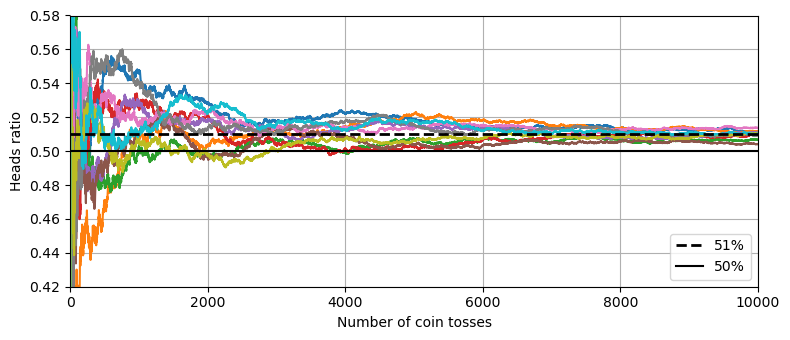

In [1]:
# extra code – this cell generates and saves Figure 7–3

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [4]:
voting_clf.predict(X_test[:1])

array([1], dtype=int64)

In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]

In [6]:
voting_clf.score(X_test, y_test)

0.912

In [7]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

[返回](readme.md)